# Исследование объявлений о продаже квартир


In [ ]:
import pandas as pd

### Откроем данные и проведем первичный просмотр

In [ ]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

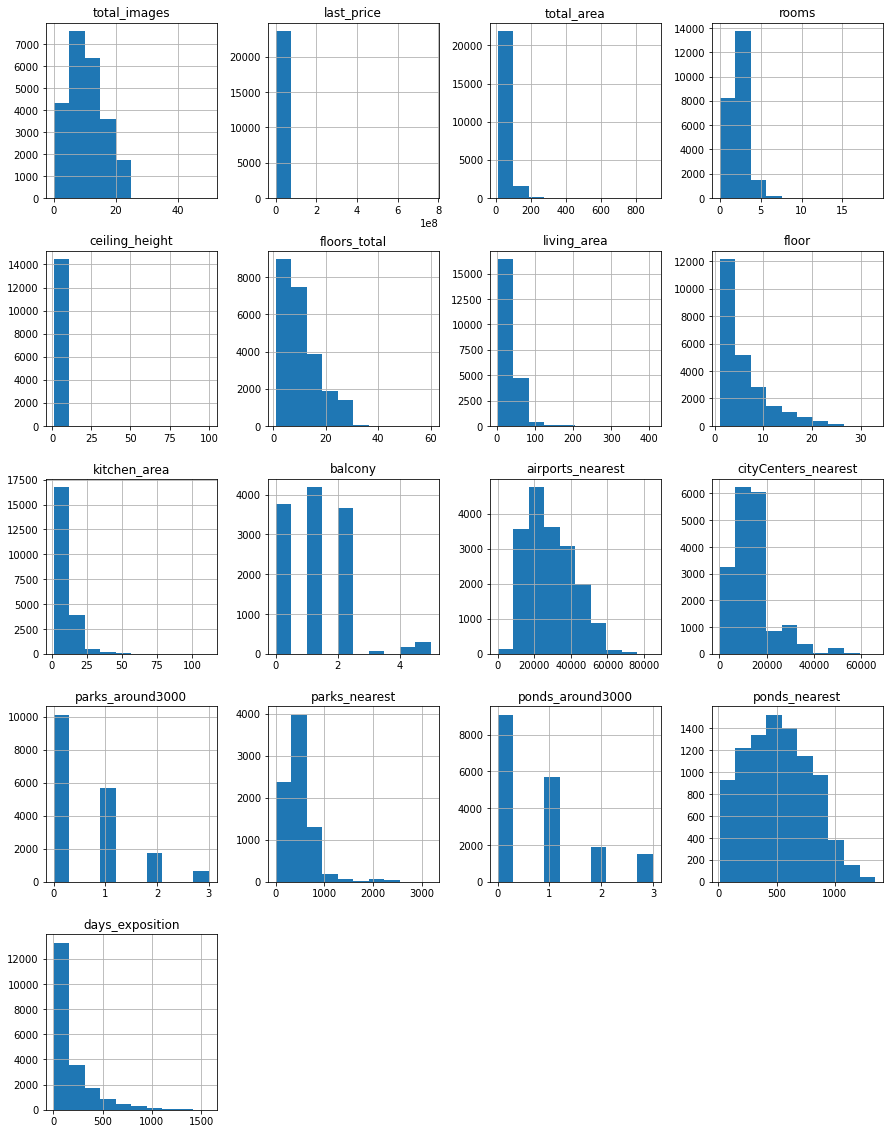

In [ ]:
data.hist(figsize=(15, 20));

**Итак, после первого взгляда на наши данные можно сделать следующие выводы:**

- Очень много пропусков, почти в половине из всех столбцов в которых пропущеные значения могут достигать ~ 90% от всех значений.
- Нечитабильно отображены даты.
- Колличество комнат отображено довольно странно. Минимальное колличество равное 0. Возможно, это студия, не так страшно. Но вот максимальный показатель говорит о том, что у нас 19 комнат при максимальной площади в 900 кв.м. Возьмём на заметку и просто посмотрим на эти данные позже.
- Высота потолков. Максимальное значение по нему аж 100 метров. Но так же и минимальный говорит о том, что высота составляет 1 метр.
- Максимальное колличество этажей равняется 60. Довольно странная цифра. Обратимся к google, чтобы убедиться, что это верные показатели. По нашему запросу самым большим ЖК является «Князь Александр Невский» с максимальным колличеством в 37 этажей, т.к. в данной выборке представлены исключительно жилые помещения, то данная цифра всё более кажется нереалистичной.
- Так же обратим внимание, что в нашей выборке представлены объявления в которых максимальный этаж на котором продаётся квартира равняется 33.
- После первого взгляда на наши данные появляется всё больше и больше вопросов. Но прежде чем, проводить какие-либо исследовательские работы для начала надо разобраться с пропусками, а после посмотреть на выбросы и решить, что с ними делать.

### Предобработка данных

1. Устраняем пропуски в данных

In [ ]:
data.info() #Используем метод info, чтобы понять в каких строках есть пропуски

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [ ]:
data['is_apartment'].value_counts() #используем метод value_counts для поиска возможных закономерностей в столбцах с пропусками

False    2725
True       50
Name: is_apartment, dtype: int64

- Согласно информации из метода info, пропуски находятся в столбцах: ceiling_height, living_area, is_apartment, kitchen_area, balcony, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest,ponds_around3000,ponds_nearest, days_exposition                   
Наибольшее число пропусков допущено в столбцах: ceiling_height, is_apartment, balcony, airports_nearest, cityCenters_nearest, parks_nearest, ponds_around3000, ponds_nearest.

- Логически можно предположить, что в случае c перменными: ponds_around3000, parks_around3000, в случае отсуствия значения, это может быть истолковано как отсуствие указанных объектов в обозримом радиусе от дома, так как дом находится в какой-либо очень отдаленной области, так как судя по таблице, чаще всего значение отсуствет сразу по всем этим столбцам, в случае если речь идет о селах или поселках.

- В случае отсуствия значения balcony это может быть истолковано как отстуствие балкона в квартире и заменено на 0.

- В случае с переменной is_apartment, пропущенное значение по видимому означает, что это именно квартира а не апртаменты, соответственно значение должно быть заменено на False

- Пропуски в parks_nearest, cityCenters_nearest, airports_nearest и ponds_nearest считаю ненужными к заполнению, из-за черезмерного колличества пропусков в них и как следствие сильном смещение картины в случае последующего анализа Гистограммы

- Таким образом, логически не могут быть заменены только столбцы: ceiling_height, kitchen_area, которые в случае необходимости можно заменить медианным значением, однако сперва эти столбцы надо обработать приведя все к одному значению и удалив пики и неверные значения.

- Также для чистоты эксперимента возможно пока их стоит оставить без изменений, так как пока неясно насколько они важны для анализа и с чем связаны пропуски в этих столбцах. А также столбец- living_area, который также можно заменить меиданной исходя из колличества комнат, если это будет необходимо. Значение floors_total нельзя заменить медианой, так как по некоторым квартирам мы знаем их этажность, соответственно медианна подойдет не везде.

- Пропуски в  locality_name невозможно заполнить.

- Пропуски в days_exposition тоже сложно определить, так как доскончально известно что все эти объявления были сняты с публикации иначе они бы не находилиь в архиве и по ним бы не была указана последняя цена на момент снятия с публикация, поэтому связь между пропуещнными значениями пока непонятна.

- Пропуски скорее всего вызваны недостаточным колличеством данных в изначальном файле, из-за незаполнения этих пунктов продавцами недвижимости на сайте или же как в случае с картографисекими данными, отстусвием этих мест в максимальном рассматриваемом программой радиусе от дома.


In [ ]:
#устраняем пропуски в столбцах с картографическими данными
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
# и столбцах с пользовательскими данными, в которых пропуски можно логически устранить
data['is_apartment'] = data['is_apartment'].fillna('False')
data['balcony'] = data['balcony'].fillna(0)
# проверяем результат
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [ ]:
# Проверим данные на дубликаты
data_dup = data[data.duplicated()]
display(data_dup)
data.duplicated().sum()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


0

2. Работаем с типами данных в каждом столбце

In [ ]:
data.info() #Используем метод info, чтобы понять в каких строках какие типы данных содержатся

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

- first_day_exposition  23699 non-null  object  - должны быть дата и время, datetime64
- is_apartment          23699 non-null  object - должно быть bool, так как там значения True/False
- balcony 23699 non-null  float64 - только целые числа с колличеством объектов, дробей быть не может, должно быть- int64
- parks_around3000 23699 non-null  float64 - только целые числа с колличеством объектов, дробей быть не может, должно быть- int64
- ponds_around3000 23699 non-null  float64 - только целые числа с колличеством объектов, дробей быть не может, должно быть- int64
- days_exposition 20518 non-null  float64 - количественная переменная с кол-вом дней, дробей быть не может, должно быть- int64
- last_price - float64 - эта переменная содержит стоиомсть квартиры, маловероятно что кто-то считает стоимость в копейках, поэтому приведем данные к типу int

In [ ]:
# преобразуем данные в необходимый формат
data['balcony'] = data['balcony'].astype('int')
data['parks_around3000'] = data['parks_around3000'].astype('int')
data['ponds_around3000'] = data['ponds_around3000'].astype('int')
data['days_exposition'] = data['days_exposition'].astype('int', errors='ignore')
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['last_price'] = data['last_price'].astype('int')
# проверяем результат
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

3. Устраняем неявные дубликаты

In [ ]:
data['locality_name'].unique() #смотрим список уникальных значений в столбце

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [ ]:
data["locality_name"] = data["locality_name"].str.replace("поселок", "посёлок")
data["locality_name"] = data["locality_name"].str.replace("посёлок городского типа", "посёлок")
data["locality_name"] = data["locality_name"].str.replace("городской посёлок", "посёлок")
data["locality_name"] = data["locality_name"].str.replace("коттеджный посёлок", "посёлок")
data["locality_name"] = data["locality_name"].str.replace("садовое товарищество", "посёлок")
# заменяем все эти знаечения на поселок, как так с точки зрения географических названий, все нахвание выше ничем не отличаются от названия территориальной единицы- поселок
# проверяем результат
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'посёлок Красный Бор', 'Гатчина', 'деревня Фёдоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'деревня Новое Девяткино',
       'посёлок Металлострой', 'посёлок Лебяжье', 'посёлок Сиверский',
       'посёлок Молодцово', 'посёлок Кузьмоловский',
       'посёлок Новая Ропша', 'Павловск', 'деревня Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'деревня Куттузи', 'посёлок Аннино', 'посёлок Ефимовский',
       'посёлок Плодовое', 'деревня Заклинье', 'посёлок Торковичи',
       'посёлок Первомайское', 'Красное Село', 'посёлок Понтонный',
       'Сясьстрой', 'деревня Старая', 'деревня Лесколово',
       'посёлок Новый Свет', 'Сланцы', 'село Путилово', 'Ивангород',
       'Мурино', 'Шлиссельбург', 'Никольское', 'Зеленогорск',
       'Сосн

4. Устраняем редкие и выбивающиеся значения

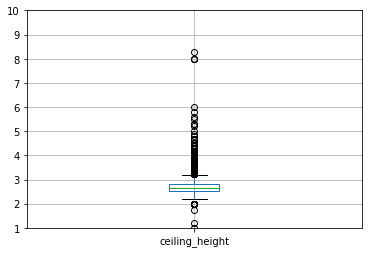

In [ ]:
# Устраняем выбросы в столбце "ceiling_height"
import matplotlib.pyplot as plt
plt.ylim(1, 10)
data.boxplot('ceiling_height')
data['ceiling_height'].describe()
# Находим с помощью диаграммы размаха выбросы и устраняем их, следя за тем, что бы строки с отсуствуюещими значениями не были удалены
# Так как наличие потолков выше 3.2 метров и менее 2 кажется крайне маловероятным, удаляем выбивающееся значения
data = data.query('2 < ceiling_height < 3.2 or ceiling_height.isna()')

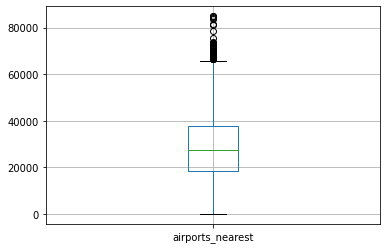

In [ ]:
# Проверяем столбец "airports_nearest"
data.boxplot('airports_nearest')
# Выбросов не так много, можем удалить их без опасений
data = data.query('airports_nearest < 70000 or airports_nearest.isna()')

<AxesSubplot:>

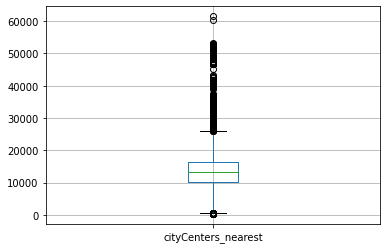

In [ ]:
# Проверяем столбец "cityCenters_nearest"
data.boxplot('cityCenters_nearest')
# Природа выбросов нам непонятна и велик шанс удалить лишнее, оставляем столбец без измененией

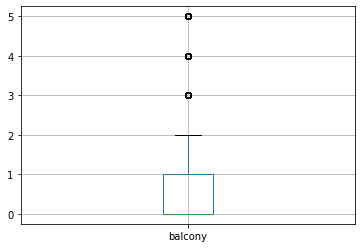

In [ ]:
# Проверяем столбец "balcony"
data.boxplot('balcony')
# Устарняем выбросы в столбце, так как наличие более двух балконов в доме крайне маловероятно и эти значения ошибки или же выбросы
data = data.query('balcony <= 2 or balcony.isna()')

<AxesSubplot:>

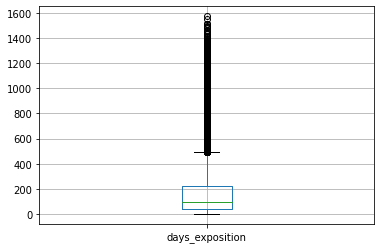

In [ ]:
# Проверяем столбец "days_exposition "
data.boxplot('days_exposition')
# Мы видим что выбросов крайне много, к сожалению нам не известна их природа и есть риск удалить нужные данные, оставляем без изменений


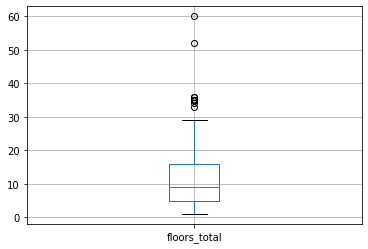

In [ ]:
# Проверяем столбец "floors_total"
data.boxplot('floors_total')
# Видим, что речь преимущественно идет о квартирах в зданиях не выше, 30 этажей, выбросов не так много (86) но они могут исказить картину
# Устарняем выбросы в столбце
data = data.query('floors_total < 30 or floors_total.isna()')

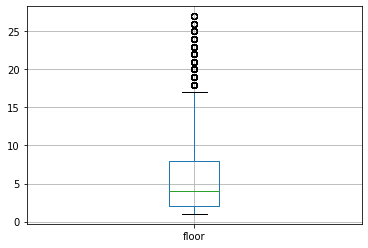

In [ ]:
# Проверяем столбец "floor"
data.boxplot('floor')
# Насколько мы видим, большая часть квартир расположены до 17 этажа, выбросов не так много и их можно смело удалить
# Устраняем выбросы в столбце
data = data.query('floor <= 17 or floor.isna()')

<AxesSubplot:>

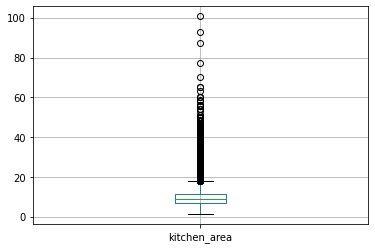

In [ ]:
# Проверяем столбец "kitchen_area"
data.boxplot('kitchen_area')
# Мы видим что выбросов крайне много, к сожалению нам не известна их природа и есть риск удалить нужные данные, оставляем без изменений

<AxesSubplot:>

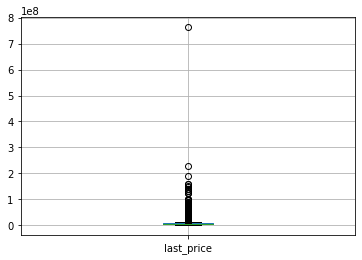

In [ ]:
# Проверяем столбец "kitchen_area"
data.boxplot('last_price')
# Разброс значений слишком велик, невозможно определить выбросы, оставляем без изменений

<AxesSubplot:>

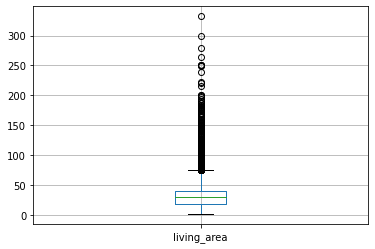

In [ ]:
# Проверяем столбец "living_area"
data.boxplot('living_area')
# Выбросов слишком много, нам не известна их природа и есть риск удалить нужные данные, оставляем без изменений

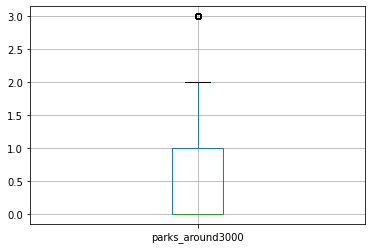

In [ ]:
# Проверяем столбец "parks_around3000"
data.boxplot('parks_around3000')
# Большей частью, речь идет о двух и менее парках в радиусе 3 киллометров, есть только 1 выброс, удаляем его
data = data.query('parks_around3000 <= 2 or parks_around3000.isna()')

<AxesSubplot:>

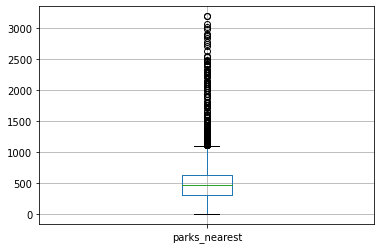

In [ ]:
# Проверяем столбец "parks_nearest"
data.boxplot('parks_nearest')
# Выбросов слишком много, нам не известна их природа и есть риск удалить нужные данные, оставляем без изменений

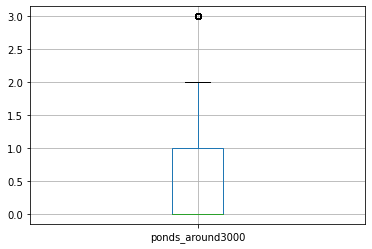

In [ ]:
# Проверяем столбец "ponds_around3000"
data.boxplot('ponds_around3000')
# Большей частью, речь идет о двух и менее прудах в радиусе 3 киллометров, есть только 1 выброс, удаляем его
data = data.query('ponds_around3000 <= 2 or ponds_around3000.isna()')

<AxesSubplot:>

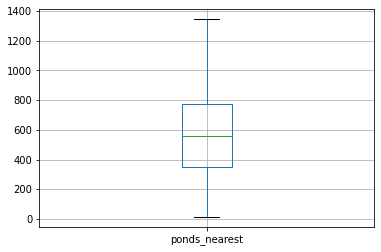

In [ ]:
# Проверяем столбец "ponds_nearest"
data.boxplot('ponds_nearest')
# Выбросов слишком много, нам не известна их природа и есть риск удалить нужные данные, оставляем без изменений

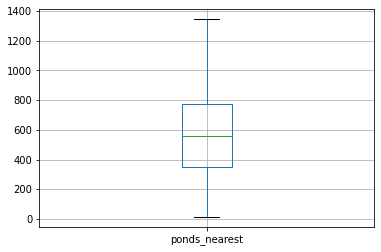

In [ ]:
# Проверяем столбец "ponds_nearest"
data.boxplot('ponds_nearest')
# Устраняем выбросы в столбце
data = data.query('ponds_nearest < 810 or ponds_nearest.isna()')

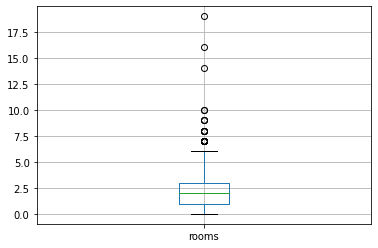

In [ ]:
# Проверяем столбец "rooms"
data.boxplot('rooms')
data['rooms'].unique()
# Большей частью, речь идет о 6 и менее комнатах в доме, по логике большее колличество комнат в квартире действительно маловероятно, выбросов не так много, удаляем их
data = data.query('rooms <= 6 or rooms.isna()')

<AxesSubplot:>

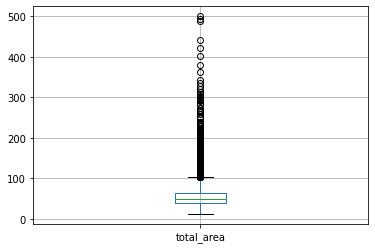

In [ ]:
# Проверяем столбец "total_area"
data.boxplot('total_area')
# # Выбросов слишком много, нам не известна их природа и есть риск удалить нужные данные, оставляем без изменений
# data = data.query('total_area > 100 or total_area.isna()')

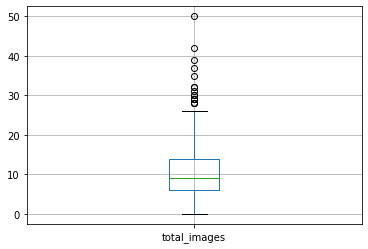

In [ ]:
# Проверяем столбец "total_images"
data.boxplot('total_images')
# Большей частью, речь идет о 26 и менее фотографиях в объявление, колличество действительно довольно значительно, по логике большее колличество фотографий действительно кажется маловероятно, выбросов не так много, удаляем их
data = data.query('total_images <= 26 or total_images.isna()')

Большей частью, выбросы выявить и ликвидировать благодаря логическим выводам (например в столбцах balcony и rooms), в тех столбцах где это было возможно, однако в довольно большом колличесвте столбцов природу аномалий так и не удалось установить и как следствие ликвидировать их не удалив из таблицы большое колличество потенциально ценных данных невозможно. Возможно проблема кроется в источнике данных

### Посчитайем и добавим в таблицу новые столбцы для более подробного анализа

In [ ]:
#Добавляем столбец- цена одного квадратного метра;
data['price_per1m'] = data['last_price'] / data['living_area']

In [ ]:
#Добавляем столбец с указанием дня публикации объявления
data['week_day'] = data['first_day_exposition'].dt.weekday

In [ ]:
#Добавляем столбец с указанием года публикации объявления
data['year'] = data['first_day_exposition'].dt.year

Поскольку обычно в датафреймах содержатся данные за несколько лет. Важно выбрать корректный метод для вычленения месяца, иначе месяца разных годов могут стать одним месяцем. Используем метод astype('datetime64[M]') чтобы избежать данной ошибки. Для его использования не нужно обращаться к pd.DatetimeIndex.

In [ ]:
#Добавляем столбец с указанием месяца публикации объявления

data['month'] = data['first_day_exposition'].dt.date
data['month'] = data['first_day_exposition'].astype('datetime64[M]')
data['month']

0       2019-03-01
1       2018-12-01
2       2015-08-01
4       2018-06-01
5       2018-09-01
           ...    
23692   2017-07-01
23693   2016-08-01
23695   2018-01-01
23696   2018-02-01
23698   2017-07-01
Name: month, Length: 18230, dtype: datetime64[ns]

In [ ]:
#Добавляем столбец- тип этажа квартиры (значения — «первый», «последний», «другой»);
data["floor_category"] = "другой"

q = data["floor"] == 1
data.loc[q, "floor_category"] = "первый"

q = data["floor"] == data["floors_total"]
data.loc[q, "floor_category"] = "последний"

In [ ]:
#Добавляем столбец- расстояние до центра города в километрах (+ с переводом из м в км и округлением до целых значений).);
data['cityCenters_km'] = data['cityCenters_nearest']//1000

In [ ]:
#Проверяем результат, все ли столбцы добавились и верно ли отображаются значения
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per1m,week_day,month,year,floor_category,cityCenters_km
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,482.0,2,755.0,NaN,254901.960784,3,2019-03-01,2019,другой,16.0
1,7,3350000,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,NaN,0,NaN,81.0,180107.526882,1,2018-12-01,2018,первый,18.0
2,10,5196000,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,90.0,2,574.0,558.0,151486.880466,3,2015-08-01,2015,другой,13.0
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,112.0,1,48.0,121.0,312500.000000,1,2018-06-01,2018,другой,8.0
5,10,2890000,30.4,2018-09-10,1,NaN,12.0,14.4,5,False,...,NaN,0,NaN,55.0,200694.444444,0,2018-09-01,2018,другой,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23692,2,1350000,30.0,2017-07-07,1,NaN,5.0,17.5,4,False,...,NaN,0,NaN,413.0,77142.857143,4,2017-07-01,2017,другой,NaN
23693,9,4600000,62.4,2016-08-05,3,2.60,9.0,40.0,8,False,...,352.0,1,675.0,239.0,115000.000000,4,2016-08-01,2016,другой,34.0
23695,14,3100000,59.0,2018-01-15,3,NaN,5.0,38.0,4,False,...,NaN,0,NaN,45.0,81578.947368,0,2018-01-01,2018,другой,NaN
23696,18,2500000,56.7,2018-02-11,2,NaN,3.0,29.7,1,False,...,NaN,0,NaN,NaN,84175.084175,6,2018-02-01,2018,первый,NaN


### Исследовательский анализ данных

1. Изучаем отдельные параметры объектов

<AxesSubplot:>

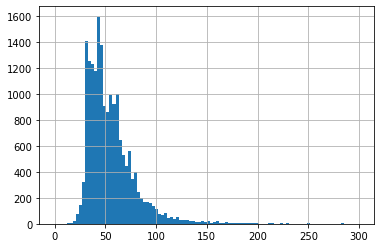

In [ ]:
data['total_area'].hist(bins=100, range=(0,300))
# Нормальное распределение графика, площадь наибольшей части квартир не превышает 40-50 квадратных метров, в среднем квартиры находятся в промежутке с 26 до 60 квадратных метров
# Хотя есть и ряд аномалий с площадью вплоть до 300 квадратных метров

<AxesSubplot:>

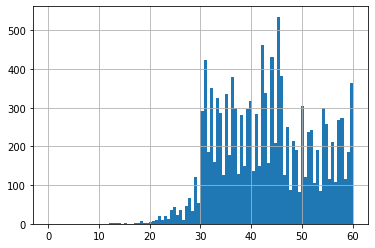

In [ ]:
data['total_area'].hist(bins=100, range=(0,60))

<AxesSubplot:>

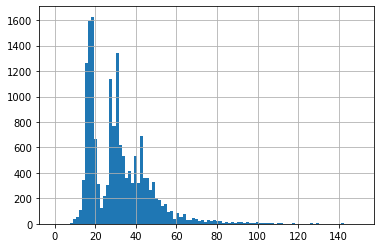

In [ ]:
data['living_area'].hist(bins=100, range=(0,150))
# Нормальное распределение графика, жилая площадь наибольшей части квартир не превышает 17-20 квадратных метров
# Хотя есть и ряд аномалий с площадью вплоть до 140 квадратных метров

<AxesSubplot:>

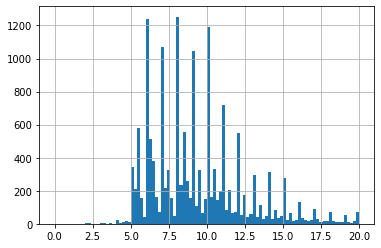

In [ ]:
data['kitchen_area'].hist(bins=100, range=(0,20))
# Нормальное распределение графика, хотя есть и несколько пиков площадь кухни наибольшей части квартир 6 - 10 квадратных метров
# Есть также и ряд аномалий с площадью вплоть до 50 квадратных метров

<AxesSubplot:>

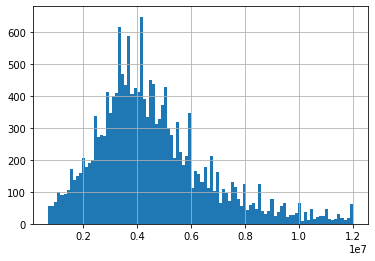

In [ ]:
data['last_price'].hist(bins=100, range=(700000,12000000))
# Нормальное распределение графика, цена наибольшей части квартир не превышает 3.5 - 4.2 миллионов

<AxesSubplot:>

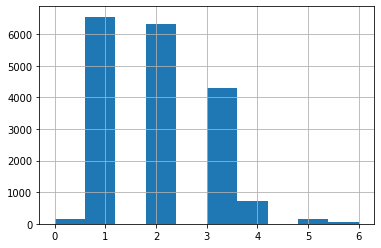

In [ ]:
data['rooms'].hist()
# Нормальное распределение графика, большая часть квартир это 1 и 2х комнатные квартиры
# Есть небольшое колличество даже и 6х комантных квартир

<AxesSubplot:>

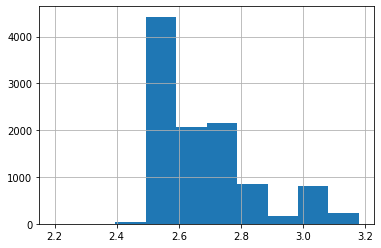

In [ ]:
data['ceiling_height'].hist()
# Нормальное распределение графика, высота потолков квартир в среднем колеблется между 2.5 и 2.6 метрами

<AxesSubplot:>

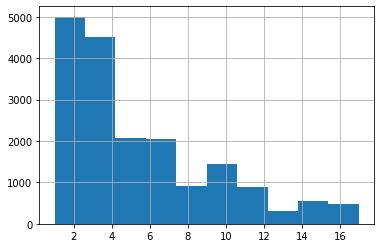

In [ ]:
data['floor'].hist()
#Согласно графику большая часть выставленных на продажу квартир располагается на 1-3 этажах

<AxesSubplot:>

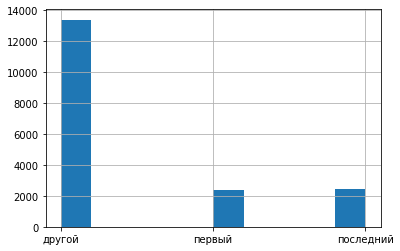

In [ ]:
data['floor_category'].hist()
#Но в то-же время болшая часть квартир, расположены не на первом или последнем этажах здания

<AxesSubplot:>

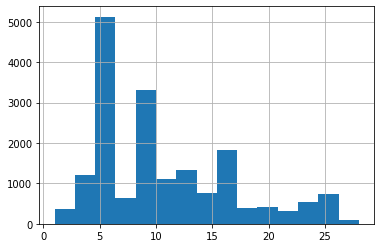

In [ ]:
data['floors_total'].hist(bins=15)
# Большая часть квартир выставленных на продажу, расположены в 4-6 этажных зданиях

<AxesSubplot:>

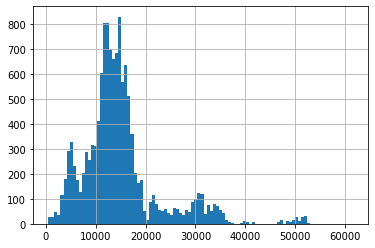

In [ ]:
data['cityCenters_nearest'].hist(bins=100)
# Большая часть выставленных на продажу квартир находится в 15 000 метров от центра города

<AxesSubplot:>

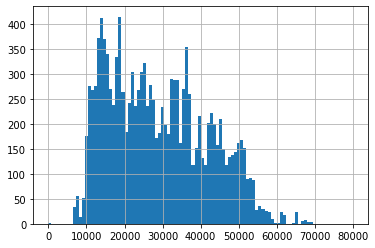

In [ ]:
data['airports_nearest'].hist(bins=100, range=(0,80000))
# Большая часть выставленных на продажу квартир находится в 13 000-15 500 метров от ближайшего аэропорта

<AxesSubplot:>

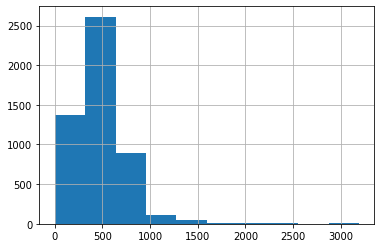

In [ ]:
data['parks_nearest'].hist()
# Большая часть выставленных на продажу квартир находится в 400 - 600 метрах от ближайшего парка, хотя также есть подовлюще большинство значений. для которых расстояние до ближайшего парка не было указано

<AxesSubplot:>

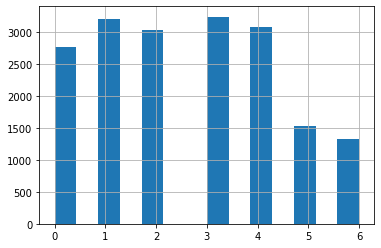

In [ ]:
data['week_day'].hist(bins=14)
# Большая часть выставленных на продажу квартир, были опубликованы в будни, преимущественно во вторник и четверг

<AxesSubplot:>

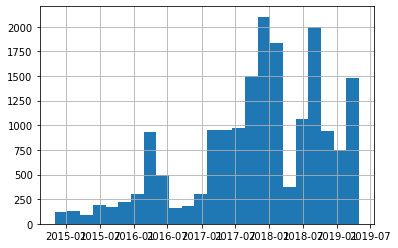

In [ ]:
data['month'].hist(bins=24)
# Большая часть объявлений были опубликованы в феврале, марте, апреле и ноябре

- общая площадь- Нормальное распределение графика, площадь наибольшей части квартир не превышает 45-50 квадратных метров, в среднем квартиры находятся в промежутке с 26 до 60 квадратных метров
- жилая площадь- Нормальное распределение графика, жилая площадь наибольшей части квартир находится в промежутке 17-20 квадратных метров
- площадь кухни- Нормальное распределение графика, хотя есть и несколько пиков площадь кухни наибольшей части квартир 6 - 10 квадратных метров
- цена объекта- цена наибольшей части квартир не превышает 3.5 - 4.2 миллиона
- количество комнат- Нормальное распределение графика, большая часть квартир это 1 и 2х комнатные квартиры. Есть небольшое колличество даже и 6х комантных квартир
- высота потолков- Нормальное распределение графика, высота потолков квартир в среднем колеблется между 2.5 и 2.6 метрами
- этаж квартиры- Согласно графику большая часть выставленных на продажу квартир располагается на 1-3 этажах
- тип этажа квартиры («первый», «последний», «другой»)- Но в то-же время болшая часть из общего числа квартир, расположены не на первом или последнем этажах здания
- общее количество этажей в доме- Большая часть квартир выставленных на продажу, расположены в 4-6 этажных зданиях
- расстояние до центра города в метрах-  Большая часть выставленных на продажу квартир находится в 15 000 метров от центра города, однао есть большое колличество квартир длякоторых расстояние до центра города не было указано
- расстояние до ближайшего аэропорта- Большая часть выставленных на продажу квартир находится в 13 000-15 500 метров от ближайшего аэропорта, однако есть и очень большое колличество объявленийдля которых расстояние до ближайшего аэропорта не было указано
- расстояние до ближайшего парка- Большая часть выставленных на продажу квартир находится в 400 - 600 метрах от ближайшего парка, хотя также есть подовлюще большинство значений. для которых расстояние до ближайшего парка не было указано
- день публикации объявления- Большая часть выставленных на продажу квартир, были опубликованы в будни, преимущественно во вторник и четверг
- месяц публикации объявления- Большая часть объявлений были опубликованы в феврале, марте, апреле и ноябре

Также, одним из результатов ислледования данных с помощью гистограмм, стала очевидная нецелесообразности, замены пропусков на 0 в столбцах: parks_nearest, cityCenters_nearest, airports_nearest и ponds_nearest из-за большого колличества пропусков в данных столбцах и как следствие то влияние, которое они оказывали на всю картину, в связи с чем я отменил заполнение данных столбцов нулями, на этапе предобработки данных, что я использовал ранее.

2. Изучиаем, как быстро продавались квартиры

AxesSubplot(0.125,0.125;0.775x0.755)
count    15896.000000
mean       173.841721
std        212.768629
min          1.000000
25%         44.000000
50%         92.000000
75%        218.000000
max       1553.000000
Name: days_exposition, dtype: float64
Cреднее значение= 173.84172118772017
Медиана= 92.0


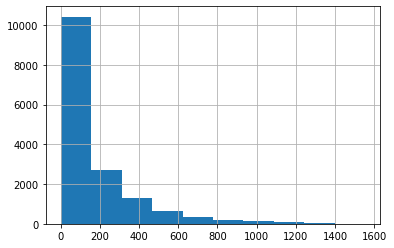

In [ ]:
print (data['days_exposition'].hist())
print (data['days_exposition'].describe())
print('Cреднее значение=', data['days_exposition'].mean())
print('Медиана=', data['days_exposition'].median())

AxesSubplot(0.125,0.125;0.775x0.755)


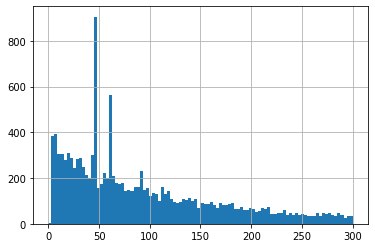

In [ ]:
print (data['days_exposition'].hist(bins=100, range=(0,300)))

Обычно продажа занимает 92 дня, быстрыми можно считать продажи происходящие в промежутке от 1 до 40 дней, а необычайно долгими, все выходяшее за пределы 220 дней и до 1553 дней

Также, на графике мы можем наблюдать аномалии на 45, 60 и 90 день. Возможно в этих случаях речь идет о графиках продажи какого-либо агентсва или автоматическом удалении выставленных объявлений в системе по прошествию опредленного периода времени в случае отсутствия активности по ним или работе какого-либо алгоритма.

3. Какие факторы больше всего влияют на общую (полную) стоимость объекта?

0.7259288003493533

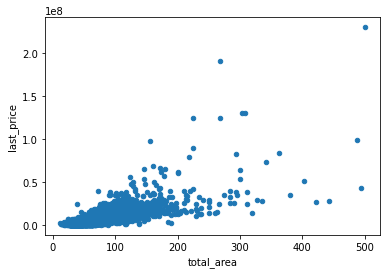

In [ ]:
# Изучаем, зависит ли цена от общей площади
# Чтобы узнать это, построим диаграмму рассеяния и посмотрим на значение Коэффициента Пирсона
data.plot(x='total_area', y='last_price', kind='scatter')
data['total_area'].corr(data['last_price'])

0.6291141500831403

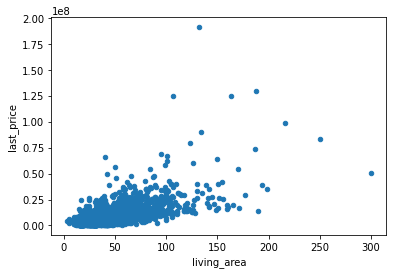

In [ ]:
# Изучаем, зависит ли цена от жилой площади
# Чтобы узнать это, построим диаграмму рассеяния и посмотрим на значение Коэффициента Пирсона
data.plot(x='living_area', y='last_price', kind='scatter')
data['living_area'].corr(data['last_price'])

0.5451518549082082

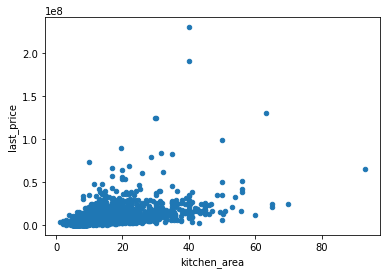

In [ ]:
# Изучаем, зависит ли цена от площади кухни
# Чтобы узнать это, построим диаграмму рассеяния и посмотрим на значение Коэффициента Пирсона
data.plot(x='kitchen_area', y='last_price', kind='scatter')
data['kitchen_area'].corr(data['last_price'])

0.3925381716790214

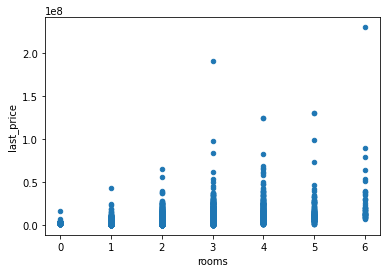

In [ ]:
# Изучаем, зависит ли цена от количества комнат
# Чтобы узнать это, построим диаграмму рассеяния и посмотрим на значение Коэффициента Пирсона
data.plot(x='rooms', y='last_price', kind='scatter')
data['rooms'].corr(data['last_price'])

<AxesSubplot:xlabel='floor_category', ylabel='last_price'>

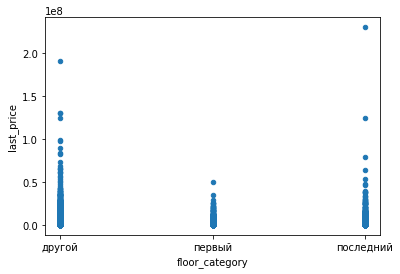

In [ ]:
# Изучаем, зависит ли цена от этажа, на котором расположена квартира (первый, последний, другой)
# Чтобы узнать это, построим диаграмму рассеяния, коэффициент пирсона в этом случае построить не удастся, так как речь идет о строковом значение
data.plot(x='floor_category', y='last_price', kind='scatter')

0.005384136945315869

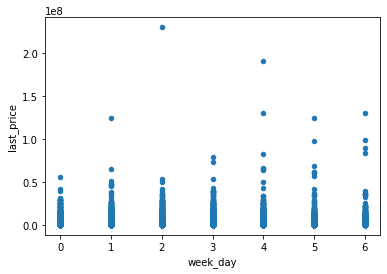

In [ ]:
# Изучаем, зависит ли цена от даты размещения (день недели).
# Чтобы узнать это, построим диаграмму рассеяния и посмотрим на значение Коэффициента Пирсона
data.plot(x='week_day', y='last_price', kind='scatter')
data['week_day'].corr(data['last_price'])

<AxesSubplot:xlabel='month', ylabel='last_price'>

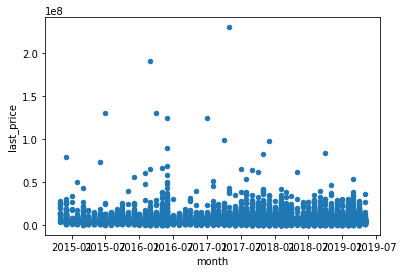

In [ ]:
# Изучаем, зависит ли цена от даты размещения (месяц).
# Чтобы узнать это, построим диаграмму рассеяния и посмотрим на значение Коэффициента Пирсона
data.plot(x='month', y='last_price', kind='scatter')

-0.04699012966338642

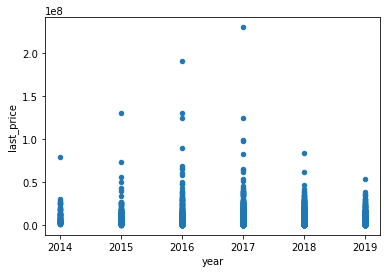

In [ ]:
# Изучаем, зависит ли цена от даты размещения (год).
# Чтобы узнать это, построим диаграмму рассеяния и посмотрим на значение Коэффициента Пирсона
data.plot(x='year', y='last_price', kind='scatter')
data['year'].corr(data['last_price'])

Наибольшая корреляция наблюдается между ценой и общей площадью квартиры, площадь кухни и жилая площадь чуть меньше влияют на итоговую цену.

Наименьшая корреляция наблюдаетя у дат публикации объявления, день недели и месяц не влияют на цену кваритры, единственное что можно сказать так это то, что с каждым годом стоиомость квартир постепенно снижается и уменьшается число выбросов, наибольший пик приходился на 2016 год.

Корреляция между ценой квартиры и колличеством комнат таже есть, однако она крайне невелика. Также небольшая корреляция есть и в связи с этажностью квартиры. Квартиры на первых этажах как правило стоят меньше чем другие квартиры, квартиры на последних этажах стоят в среднем чуть дороже, но не больше чем квартиры расположенные на любом другом этаже, кроме первого и последнего.

<AxesSubplot:xlabel='year', ylabel='total_area'>

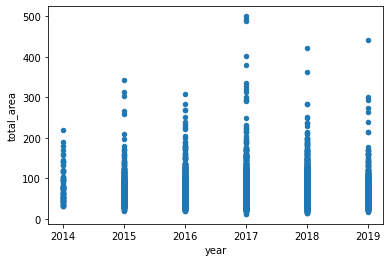

In [ ]:
# Изучим, зависит ли общая площадь квартир от даты размещения (год).
# Чтобы узнать это, построим диаграмму рассеяния и посмотрим на значение Коэффициента Пирсона
data.plot(x='year', y='total_area', kind='scatter')

-0.07515479641492832

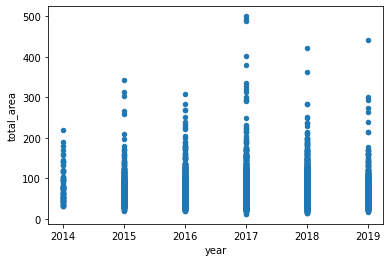

In [ ]:
# Изучим, зависит ли стоимость одного квадратного метра квартиры от даты размещения (год).
# Чтобы узнать это, построим диаграмму рассеяния и посмотрим на значение Коэффициента Пирсона
data.plot(x='year', y='total_area', kind='scatter')
data['year'].corr(data['total_area'])

4. Считаем среднюю цену одного квадратного метра в топ 10 населённых пунктах

In [ ]:
#Групируем данные по колличеству объявлений, чтобы получить топ 10
data_per1sqm_grouped = data.groupby('locality_name')['floor'].count()
#Соритруем их по убыванию и сохраняем
data_per1sqm_grouped = data_per1sqm_grouped.sort_values(ascending=False)
data_per1sqm_grouped = data_per1sqm_grouped.head(10)
# Считаем среднеюю цену квартиры для каждого места
data_per1sqm_pivot = data.pivot_table(index= 'locality_name', values= 'price_per1m', aggfunc= 'mean' )
# Объединяем таблицы методом merge, дабы оставить средние значения
# только по топу квартир с наибольшим колличеством объявлений полученных на первом шаге
data_per1sqm = data_per1sqm_pivot.merge(data_per1sqm_grouped, on='locality_name', how='right')
data_per1sqm

,price_per1m,floor
locality_name,,
Санкт-Петербург,201705.201204,11274
посёлок Мурино,173676.790836,462
Всеволожск,133519.525690,377
посёлок Шушары,156656.572258,375
Гатчина,120977.187299,291
Пушкин,186044.949089,263
деревня Кудрово,190617.002915,255
Колпино,131213.937341,254
посёлок Парголово,196295.547011,225


In [ ]:
#Вычисляем населеднные пункты с самым большой и наименьшей стоимостью квадратного метра.
data_per1sqm_all = data.pivot_table(index= 'locality_name', values= 'price_per1m', aggfunc= 'mean' )
data_per1sqm_all = data_per1sqm_all.sort_values(by='price_per1m',ascending=False)
data_per1sqm_all

,price_per1m
locality_name,
посёлок Новая Ропша,250000.000000
Кудрово,209388.770740
Санкт-Петербург,201705.201204
Сестрорецк,197432.551871
посёлок Парголово,196295.547011
...,...
посёлок Совхозный,22600.000000
посёлок Тёсово-4,20833.333333
деревня Выскатка,18856.907895


Самая высокая стоимость квадратного метра у квартир расположенных в посёлке Новая Ропша, а самая низкая в деревня Малая Романовка. И оба этих населенных пункта не входят в топ 10, по числу опубликованных объявлений.

5. Изучим зависимость между расстоянием от центра и ценой квадратного метра квартиры для Санкт-Петербурга

In [ ]:
# Отсортировываем из общего списка квартиры находяшиеся в Санкт-Петерубрге и созраняем их в переменной - spb_flats
spb_flats= data.query('locality_name == "Санкт-Петербург"')
# Добавляем в датафрейм новый столбец со стоимостью за каждый килломент от центра города
spb_flats['price_per_km_from_CityCenter'] = spb_flats['last_price'] / spb_flats['cityCenters_km']
# Высчитываем среднюю цену каждого киллометра и выводим результат на экран
spb_flats['price_per_km_from_CityCenter'].mean()

/tmp/ipykernel_31/2994012846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spb_flats['price_per_km_from_CityCenter'] = spb_flats['last_price'] / spb_flats['cityCenters_km']


inf

<AxesSubplot:xlabel='cityCenters_km', ylabel='price_per_km_from_CityCenter'>

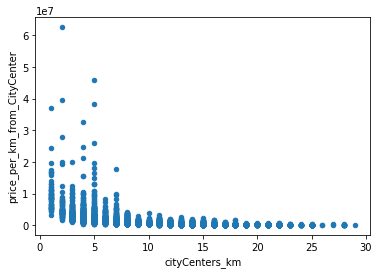

In [ ]:
# C помощью графика смотрим, как удалленость от центра города влияет на стоимость киллометра
spb_flats.plot(x='cityCenters_km', y='price_per_km_from_CityCenter', kind='scatter')


<AxesSubplot:xlabel='cityCenters_km', ylabel='last_price'>

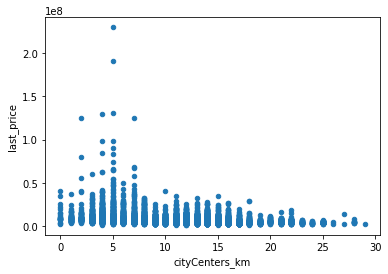

In [ ]:
# C помощью графика смотрим, как удалленость от центра города влияет на стоимость квартиры
spb_flats.plot(x='cityCenters_km', y='last_price', kind='scatter')


Добавим ниже линейную диаграмму и посмотрим динамику и зависимость цены от расстояния


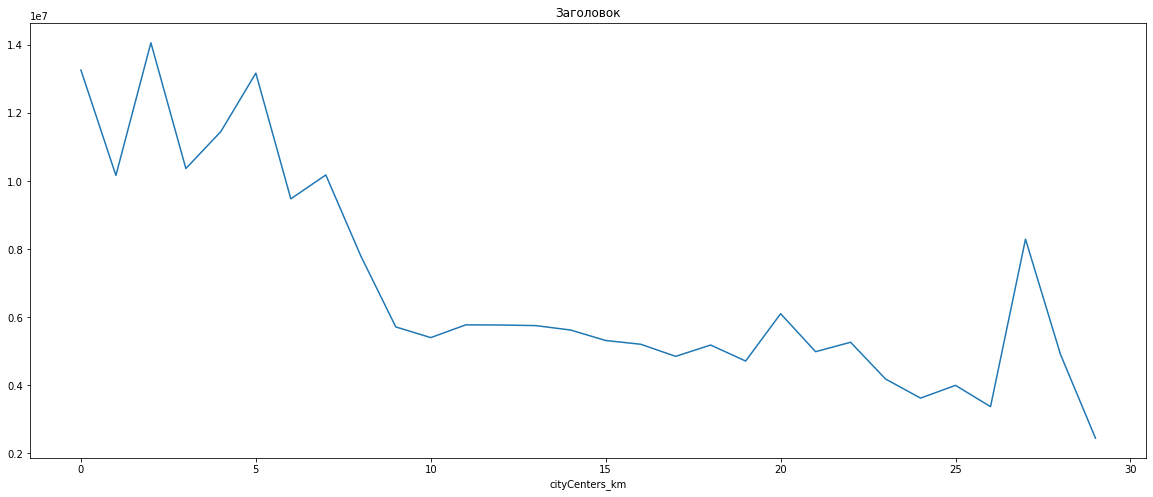

In [ ]:
data[data['locality_name'] == 'Санкт-Петербург'].groupby('cityCenters_km')['last_price'].mean().plot(figsize = (20, 8),
    title = ('Заголовок'));

Как и следовало ожидать, чем дальше квартира находится от центра города, тем меньше стоит каждый ее киллометр и тем меньше стоит сама квартира, что мы прекасно можем видеть на графиках. Соответственно чем дальше от центра города находится квартира, тем она дешевле.

За вычетом нескольких исключений, где на цену могут сущетсвенно влиять другие факторы, большая часть объявлений соответствует этому правилу. Однако это правило верно только для Санк-Петерьурга, согласно общему выводу по таблице со всеми значениями, чем дальше квартира находится от центра города тем она дороже, однако в случае с Питером зависимость наблюдается ровно противоположная.

### Общий вывод

В ходе исследования был выявлен ряд интересных факторов, касающихся как общей ситуации на рынке недвижимости, так и факторов, оказывающих наиболшее влияние на итоговую цену объекта. И даже сделать некоторые предположения касательно будущих объявлений и их динамики.

Так например нам удалось вывести портрет среднего, наиболее популярного типа квартиры, выставляемого на продажу, это квартира:
общей площадью 45-50 квадратных метров, стоящая 3.5 - 4.2 миллиона, чаще всего это 1 или 2 однкомнатная квартира, с высотой потолка 2.5 - 2.6 метров, расположенная на 2 или 3м этажей в 4-6 этажном доме, находящаяся в 15 000 метров от центра города, в 400-600 метрах от парка и 13-15 000 метров от ближайшего аэропорта, публикуются такие объявления преимущественно в будние дни, прежде всего по вторникам и четвергам, а большая часть объявлений публикуется в Феврале и Марте.

Удалось вывести и среднюю скороть продажи квартир. Так, обычно продажа занимает 92 дня, быстрыми можно считать продажи происходящие в промежутке от 1 до 40 дней, а необычайно долгими, все выходяшее за пределы 220 дней и до 1553 дней.

Наибольшим фактором влияющим на итоговую стоимость квартиры, является именно общая площадь квартиры, площадь кухни и жилая площадь чуть меньше влияют на итоговую цену, нежели ее общая площадь. Наименьшая корреляция наблюдаетя у дат публикации объявления, день недели и месяц не влияют на цену кваритры, единственное что можно сказать так это то, что с каждым годом стоиомость квартир постепенно снижается и уменьшается число выбросов, наибольший пик приходился на 2016 год.

Корреляция между ценой квартиры и колличеством комнат таже есть, однако она крайне невелика. Также небольшая корреляция есть и в связи с этажностью квартиры. Квартиры на первых этажах как правило стоят меньше чем другие квартиры, квартиры на последних этажах стоят в среднем чуть дороже, но не больше чем квартиры расположенные на любом другом этаже, кроме первого и последнего.

Также нам удалсь вывести топ10 квартир с наибольшим числом объявлений, в этот список вошли (Санкт-Петербург, посёлок Мурино,
Всеволожск, посёлок Шушары, Гатчина, Пушкин, деревня Кудрово, Колпино, посёлок Парголово и Выборг). Самая высокая стоимость квадратного метра у квартир расположенных в посёлке Новая Ропша, а самая низкая в деревня Малая Романовка. И оба этих населенных пункта не входят в топ 10, по числу опубликованных объявлений.

Как и следовало ожидать, чем дальше квартира находится от центра города, тем меньше стоит каждый ее киллометр и тем меньше стоит сама квартира, что мы прекасно можем видеть на графиках. Соответственно чем дальше от центра города находится квартира, тем она дешевле. За вычетом нескольких исключений, где на цену могут сущетсвенно влиять другие факторы, большая часть объявлений соответствует этому правилу. Однако это правило верно только для Санк-Петерьурга, согласно общему выводу по таблице со всеми значениями, чем дальше квартира находится от центра города тем она дороже, однако в случае с Питером зависимость наблюдается ровно противоположная.

Также, одним из выводов сделанных в процессе анализа можно считать то, что изначально в данных было допущено достаточно много пропусков, причем большей частью они присутствовали в картографических данных, нежели в данных вносимых пользователями, что может говорить или о несовершенстве алгоритмов или же о несовсем верной выгрузке данных.